<a href="https://colab.research.google.com/github/woraphonp-038-5/Project-Big-Data/blob/main/ThaiBaan_Data_Analytics_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 2: Data Analytics and Modeling

<img src="https://datarundown.com/wp-content/uploads/2023/05/Model-Data-Analytics.jpg" width="400px">

ชื่อกลุ่ม: ...

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. ...
2. ...
3. ...
4. ...

กำหนดส่ง: ศุกร์ 24 ตุลาคม 2568  

รายงานในชั้นเรียน: เสาร์ 25 ตุลาคม 2568

** NOTE **
* อย่าลืมบันทึกงานที่ทำในโน้ตบุ๊คนี้เป็นประจำขณะทำงาน มิเช่นนั้นงานที่ทำอยู่อาจสูญหายได้
* **เริ่มทำแต่เนิ่น ๆ อย่ารอที่จะทำก่อนส่ง เพราะจะทำไม่เสร็จ เนื่องจากปัญหามากมายที่จะเกิดขึ้นระหว่างการทำงาน และอาจารย์ไม่รับปรึกษาในคืนก่อนส่ง**
----------------------

### เลือกชุดข้อมูล 1 ชุดจากข้อมูลที่กำหนดให้ต่อไปนี้
* <b>MovieLens 1M Data Set<b>
    * ข้อมูลชุดนี้มีข้อมูลเกี่ยวกับ movies, users, และ how they rate the movies
    * สามารถดูรายละเอียดได้ที่ http://grouplens.org/datasets/movielens/
    * Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/
    * Merge all of the data into a single Pandas DataFrame. See
        * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
    
* <b>Walmart_Sales_Forecast<b>
    * สามารถดูรายละเอียดได้ที่ https://github.com/Asikpalysik/Walmart_Sales_Forecast/tree/main
    * ข้อมูลประกอบด้วยไฟล์ features.csv, stores.csv และ ข้อมูลยอดขาย (train.csv และ test.csv)
    * ให้ใช้ข้อมูลจากทุกไฟล์ทุกอย่างประกอบกันในการวิเคราะห์
    
* <b>NYC Taxi Trips<b>
    * ข้อมูลทริปของแท็กซี่ในเมืองนิวยอร์กจาก https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
    * ข้อมูลเก็บโดย The NYC Taxi and Limousine Commission (TLC) ประกอบด้วย pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts
    * นอกจากไฟล์ข้อมูลทริปของแท็กซี่แล้ว ยังมีข้อมูลเกี่ยวกับ zone ของพื้นที่ที่ให้บริการ และคำอธิบายข้อมูลในส่วนล่างสุดของหน้าเดียวกัน
    * ให้ศึกษาข้อมูลการเดินทางของแท็กซี่เหลืองหรือแท็กซี่เขียวในช่วงหนึ่ง (เช่น 1 เดือน หรือ 1 ปีที่ผ่านมา เป็นต้น)
    * ตัวอย่างการอ่านไฟล์ parquet
    ```python
    # install this module to read .parquet files
    !pip install pyarrow
    import pyarrow.parquet as pq
    trips = pq.read_table('yellow_tripdata_2023-09.parquet')
    trips = trips.to_pandas()
    trips
    ```
    
----------------------------------

### ศึกษาข้อมูลที่เลือกใช้ แล้วทำการ
* Tell story about data อธิบายลักษณะของข้อมูล ทำความเข้าใจเกี่ยวกับข้อมูลชุดนี้ ด้วยสถิติ และนำเสนอด้วยแผนภาพ แผนภูมิ หรือกราฟต่าง ๆ
* ตั้ง<span style="color:red">*ปัญหาหรือคำถามเชิงองค์กรหรือธุรกิจ*</span>ที่กลุ่มท่านสนใจเกี่ยวกับข้อมูลนี้ แล้วทำการคาดการณ์ (conjectures) เกี่ยวกับ<span style="color:red">*ปัญหาหรือคำถาม*</span>ที่ได้ตั้งไว้อย่างน้อย 3 ข้อ แล้วสนับสนุนหรือปฏิเสธข้อคาดการณ์ด้วยการวิเคราะห์ข้อมูลหรือด้วย data visualization
    * ปัญหาที่สนใจมีความสำคัญอย่างไร?
    * ข้อคาดการณ์ของท่านจะนำไปสู่การแก้ไขปัญหาหรือตอบคำถามอย่างไร?
* สร้างตัวแบบทำนายโดยใช้ข้อมูลที่เลือกในการตอบปัญหาหรือคำถาม
    * prepare data
    * feature engineering
    * partition data (consider class if any)
    * handle imbalance data
    * build model
      * hyperparameter tuning
    * test model

## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load data
movies = '/content/drive/My Drive/ProjectBigData/ml-1m/movies.dat'
ratings = '/content/drive/My Drive/ProjectBigData/ml-1m/ratings.dat'
users = '/content/drive/My Drive/ProjectBigData/ml-1m/users.dat'

# Load data into pandas DataFrames
movies_df = pd.read_csv(movies, sep='::', engine='python', encoding='latin-1', names=['MovieID', 'Title', 'Genres'])
ratings_df = pd.read_csv(ratings, sep='::', engine='python' , encoding='latin-1', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
users_df = pd.read_csv(users, sep='::', engine='python', encoding='latin-1', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

In [ ]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


## Data Preparation

In [ ]:
# Explore variables and check data quality

# Handle missing values, outliers, and noises

# Perform feature engineering (optional)

In [ ]:
# Merge data
# Merge ratings and users DataFrames
merged_df = pd.merge(ratings_df, users_df, on='UserID')

# Merge the result with the movies DataFrame
merged_df = pd.merge(merged_df, movies_df, on='MovieID')

In [ ]:
# Date Time
merged_df['Datetime'] = pd.to_datetime(merged_df['Timestamp'], unit='s')

# แยกคอลัมน์ Genres ด้วยตัวคั่น '|'
# โดยจำกัดจำนวนคอลัมน์สูงสุดเป็น 3 (สามารถเพิ่มหรือลดตามความเหมาะสม)
split_genres = merged_df['Genres'].str.split('|', expand=True)

# ตั้งชื่อคอลัมน์ใหม่ Genre1, Genre2, Genre3 โดยใช้ iloc เพื่อเลือกคอลัมน์ที่ต้องการ
merged_df['Genre1'] = split_genres.iloc[:, 0]
merged_df['Genre2'] = split_genres.iloc[:, 1]
merged_df['Genre3'] = split_genres.iloc[:, 2]

# ลบคอลัมน์ Genres ออก
merged_df = merged_df.drop(columns=['Genres'])

merged_df['DayOfWeek'] = merged_df['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
merged_df['Month'] = merged_df['Datetime'].dt.month
merged_df['Year_vote'] = merged_df['Datetime'].dt.year
merged_df['Hour'] = merged_df['Datetime'].dt.time

# ฟังก์ชันเพื่อแปลง Genre เป็นตัวเลข
def genre_to_number(genre):
    # ถ้า genre เป็น None หรือค่าว่าง ให้คืนค่า 0
    if genre is None or genre == '':
        return 0

    # Check if genre is of type int or float before proceeding
    if isinstance(genre, (int, float)):
        return genre  # Return the value as is if it's already numeric

    genre_dict = {
        "Action": 1,
        "Adventure": 2,
        "Animation": 3,
        "Children's": 4,
        "Comedy": 5,
        "Crime": 6,
        "Documentary": 7,
        "Drama": 8,
        "Fantasy": 9,
        "Film-Noir": 10,
        "Horror": 11,
        "Musical": 12,
        "Mystery": 13,
        "Romance": 14,
        "Sci-Fi": 15,
        "Thriller": 16,
        "War": 17,
        "Western": 18,
    }

    # Strip any leading/trailing whitespace and return corresponding value or 0 if not found
    return genre_dict.get(genre.strip(), 0)  # Return 0 for unknown genres

# ใช้ apply เพื่อแปลง Genre1, Genre2, Genre3
merged_df['Genre1'] = merged_df['Genre1'].apply(genre_to_number)
merged_df['Genre2'] = merged_df['Genre2'].apply(genre_to_number)
merged_df['Genre3'] = merged_df['Genre3'].apply(genre_to_number)

In [ ]:
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Datetime,Genre1,Genre2,Genre3,DayOfWeek,Month,Year_vote,Hour
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),2000-12-31 22:12:40,8,0,0,6,12,2000,22:12:40
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),2000-12-31 22:35:09,3,4,12,6,12,2000,22:35:09
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),2000-12-31 22:32:48,12,14,0,6,12,2000,22:32:48
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),2000-12-31 22:04:35,8,0,0,6,12,2000,22:04:35
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",2001-01-06 23:38:11,3,4,5,5,1,2001,23:38:11


In [ ]:
# คำนวณค่าเฉลี่ยการให้คะแนน (avg_rating) และจำนวนผู้ใช้ที่ให้คะแนน (votes) ต่อเรื่อง
movie_stats = (
    merged_df.groupby(['Title', 'Genre1', 'Genre2', 'Genre3'])
    .agg(avg_rating=('Rating', 'mean'), votes=('UserID', 'nunique'))
    .reset_index()
)


# Extract the year from the title
movie_stats['Year_movie'] = movie_stats['Title'].str.extract(r'\((\d{4})\)').astype(str)
# แสดงผลลัพธ์
movie_stats.head()

,Title,Genre1,Genre2,Genre3,avg_rating,votes,Year_movie
0,"$1,000,000 Duck (1971)",4,5,0,3.027027,37,1971
1,'Night Mother (1986),8,0,0,3.371429,70,1986
2,'Til There Was You (1997),8,14,0,2.692308,52,1997
3,"'burbs, The (1989)",5,0,0,2.910891,303,1989
4,...And Justice for All (1979),8,16,0,3.713568,199,1979


In [ ]:
merged_df = pd.merge(merged_df, movie_stats[['Title', 'avg_rating', 'votes', 'Year_movie']],
                      on=['Title'],
                      how='left')

In [ ]:
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Datetime,Genre1,Genre2,Genre3,DayOfWeek,Month,Year_vote,Hour,avg_rating,votes,Year_movie
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),2000-12-31 22:12:40,8,0,0,6,12,2000,22:12:40,4.390725,1725,1975
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),2000-12-31 22:35:09,3,4,12,6,12,2000,22:35:09,3.464762,525,1996
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),2000-12-31 22:32:48,12,14,0,6,12,2000,22:32:48,4.154088,636,1964
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),2000-12-31 22:04:35,8,0,0,6,12,2000,22:04:35,3.863878,1315,2000
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",2001-01-06 23:38:11,3,4,5,5,1,2001,23:38:11,3.854375,1703,1998


In [ ]:
merged_df['Gender'] = merged_df['Gender'].map({'M': 0, 'F': 1})
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Datetime,Genre1,Genre2,Genre3,DayOfWeek,Month,Year_vote,Hour,avg_rating,votes,Year_movie
0,1,1193,5,978300760,1,1,10,48067,One Flew Over the Cuckoo's Nest (1975),2000-12-31 22:12:40,8,0,0,6,12,2000,22:12:40,4.390725,1725,1975
1,1,661,3,978302109,1,1,10,48067,James and the Giant Peach (1996),2000-12-31 22:35:09,3,4,12,6,12,2000,22:35:09,3.464762,525,1996
2,1,914,3,978301968,1,1,10,48067,My Fair Lady (1964),2000-12-31 22:32:48,12,14,0,6,12,2000,22:32:48,4.154088,636,1964
3,1,3408,4,978300275,1,1,10,48067,Erin Brockovich (2000),2000-12-31 22:04:35,8,0,0,6,12,2000,22:04:35,3.863878,1315,2000
4,1,2355,5,978824291,1,1,10,48067,"Bug's Life, A (1998)",2001-01-06 23:38:11,3,4,5,5,1,2001,23:38:11,3.854375,1703,1998


In [ ]:
df_zip = pd.read_csv('/content/drive/MyDrive/ProjectBigData/ml-1m/georef-united-states-of-america-zc-point.csv', sep=';')
df_zip.head()

,Zip Code,Official USPS city name,Official USPS State Code,Official State Name,ZCTA,ZCTA parent,Population,Density,Primary Official County Code,Primary Official County Name,County Weights,Official County Name,Official County Code,Imprecise,Military,Timezone,Geo Point
0,75010,Carrollton,TX,Texas,True,NaN,30406.0,1452.9,48121,Denton,"{""48121"": ""100""}",Denton,48121,False,False,America/Chicago,"33.03425, -96.89673"
1,14783,Steamburg,NY,New York,True,NaN,305.0,4.7,36009,Cattaraugus,"{""36009"": ""100""}",Cattaraugus,36009,False,False,America/New_York,"42.07798, -78.88412"
2,15675,Penn,PA,Pennsylvania,True,NaN,895.0,373.3,42129,Westmoreland,"{""42129"": ""100""}",Westmoreland,42129,False,False,America/New_York,"40.33531, -79.63708"
3,31057,Marshallville,GA,Georgia,True,NaN,2006.0,8.9,13193,Macon,"{""13193"": ""100""}",Macon,13193,False,False,America/New_York,"32.43286, -83.93537"
4,32202,Jacksonville,FL,Florida,True,NaN,6523.0,1268.6,12031,Duval,"{""12031"": ""100""}",Duval,12031,False,False,America/New_York,"30.32503, -81.64802"


In [ ]:
# Rename columns in df_zip
df_zip.rename(columns={'Zip Code': 'Zip-code', 'Official USPS city name': 'city','Official State Name': 'state','Primary Official County Name' :'country'} ,inplace=True)

# Display the updated DataFrame to verify the changes
df_zip.head()

,Zip-code,city,Official USPS State Code,state,ZCTA,ZCTA parent,Population,Density,Primary Official County Code,country,County Weights,Official County Name,Official County Code,Imprecise,Military,Timezone,Geo Point
0,75010,Carrollton,TX,Texas,True,NaN,30406.0,1452.9,48121,Denton,"{""48121"": ""100""}",Denton,48121,False,False,America/Chicago,"33.03425, -96.89673"
1,14783,Steamburg,NY,New York,True,NaN,305.0,4.7,36009,Cattaraugus,"{""36009"": ""100""}",Cattaraugus,36009,False,False,America/New_York,"42.07798, -78.88412"
2,15675,Penn,PA,Pennsylvania,True,NaN,895.0,373.3,42129,Westmoreland,"{""42129"": ""100""}",Westmoreland,42129,False,False,America/New_York,"40.33531, -79.63708"
3,31057,Marshallville,GA,Georgia,True,NaN,2006.0,8.9,13193,Macon,"{""13193"": ""100""}",Macon,13193,False,False,America/New_York,"32.43286, -83.93537"
4,32202,Jacksonville,FL,Florida,True,NaN,6523.0,1268.6,12031,Duval,"{""12031"": ""100""}",Duval,12031,False,False,America/New_York,"30.32503, -81.64802"


In [ ]:
# แปลง Zip-code และ Zip Code ให้เป็นชนิดข้อมูล string
# แก้ไข: ใช้ df_zip.columns[0] เพื่ออ้างอิงคอลัมน์แรกแทนชื่อคอลัมน์โดยตรง
df_zip['Zip-code'] = df_zip['Zip-code'].astype(str)
merged_df['Zip-code'] = merged_df['Zip-code'].astype(str)

# Merge DataFrames โดยใช้ Zip-code และ Zip Code
# แก้ไข: ใช้ df_zip.columns[0] เพื่ออ้างอิงคอลัมน์แรกแทนชื่อคอลัมน์โดยตรง
merged_df = pd.merge(merged_df, df_zip[['Zip-code','state']],
                      left_on='Zip-code', right_on='Zip-code', how='left')

In [ ]:
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Datetime,...,Genre2,Genre3,DayOfWeek,Month,Year_vote,Hour,avg_rating,votes,Year_movie,state
0,1,1193,5,978300760,1,1,10,48067,One Flew Over the Cuckoo's Nest (1975),2000-12-31 22:12:40,...,0,0,6,12,2000,22:12:40,4.390725,1725,1975,Michigan
1,1,661,3,978302109,1,1,10,48067,James and the Giant Peach (1996),2000-12-31 22:35:09,...,4,12,6,12,2000,22:35:09,3.464762,525,1996,Michigan
2,1,914,3,978301968,1,1,10,48067,My Fair Lady (1964),2000-12-31 22:32:48,...,14,0,6,12,2000,22:32:48,4.154088,636,1964,Michigan
3,1,3408,4,978300275,1,1,10,48067,Erin Brockovich (2000),2000-12-31 22:04:35,...,0,0,6,12,2000,22:04:35,3.863878,1315,2000,Michigan
4,1,2355,5,978824291,1,1,10,48067,"Bug's Life, A (1998)",2001-01-06 23:38:11,...,4,5,5,1,2001,23:38:11,3.854375,1703,1998,Michigan


In [ ]:
merged_df.dropna(subset=['state'], inplace=True)

In [ ]:
merged_df.isnull().sum()

,0
UserID,0
MovieID,0
Rating,0
Timestamp,0
Gender,0
Age,0
Occupation,0
Zip-code,0
Title,0
Datetime,0


In [ ]:
counts = merged_df.groupby('state').size().reset_index(name='Count')
display(counts.head())

,state,Count
0,Alabama,3480
1,Alaska,911
2,Arizona,14743
3,Arkansas,4347
4,California,176667


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 861701 entries, 0 to 1000208
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   UserID      861701 non-null  int64         
 1   MovieID     861701 non-null  int64         
 2   Rating      861701 non-null  int64         
 3   Timestamp   861701 non-null  int64         
 4   Gender      861701 non-null  int64         
 5   Age         861701 non-null  int64         
 6   Occupation  861701 non-null  int64         
 7   Zip-code    861701 non-null  object        
 8   Title       861701 non-null  object        
 9   Datetime    861701 non-null  datetime64[ns]
 10  Genre1      861701 non-null  int64         
 11  Genre2      861701 non-null  int64         
 12  Genre3      861701 non-null  int64         
 13  DayOfWeek   861701 non-null  int32         
 14  Month       861701 non-null  int32         
 15  Year_vote   861701 non-null  int32         
 16  Hour  

In [ ]:
counts = merged_df.groupby('Title').size().reset_index(name='Count')
display(counts)

,Title,Count
0,"$1,000,000 Duck (1971)",33
1,'Night Mother (1986),57
2,'Til There Was You (1997),42
3,"'burbs, The (1989)",262
4,...And Justice for All (1979),175
...,...,...
3682,"Zed & Two Noughts, A (1985)",24
3683,Zero Effect (1998),263
3684,Zero Kelvin (Kjærlighetens kjøtere) (1995),2
3685,Zeus and Roxanne (1997),16


## Explore Data

#### Descriptive statistics

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2101815 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column               Dtype         
---  ------               -----         
 0   UserID               int64         
 1   MovieID              int64         
 2   Rating               int64         
 3   Timestamp            int64         
 4   Gender               object        
 5   Age                  object        
 6   Occupation           object        
 7   Zip-code             object        
 8   Title                object        
 9   Genres               object        
 10  Datetime             datetime64[ns]
 11  Age_Group_Numerical  int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 208.5+ MB


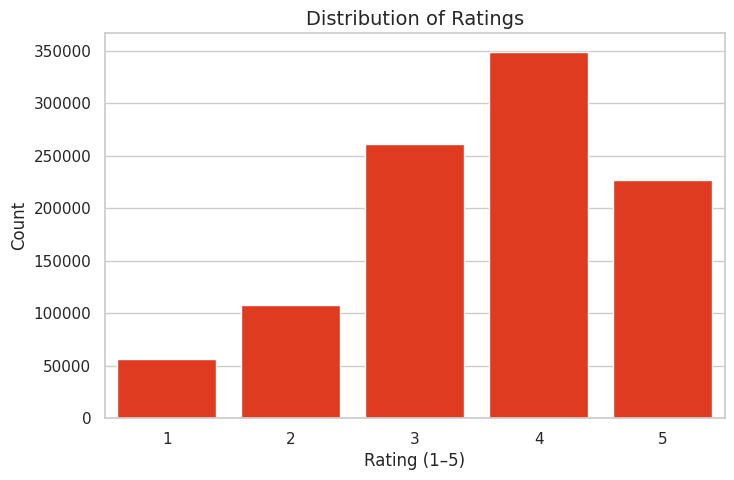

=== Descriptive Stats: Ratings ===


,Rating
count,1.000209e+06
mean,3.581564e+00
std,1.117102e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,4.000000e+00
max,5.000000e+00


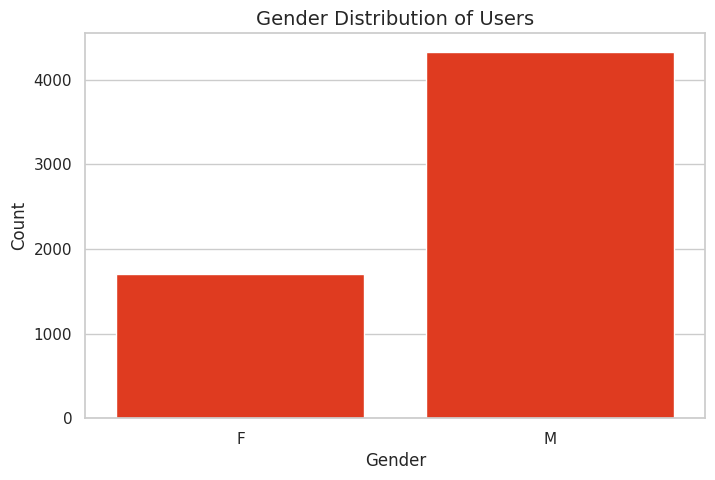

=== Gender Distribution (%) ===


,proportion
Gender,
M,71.705298
F,28.294702


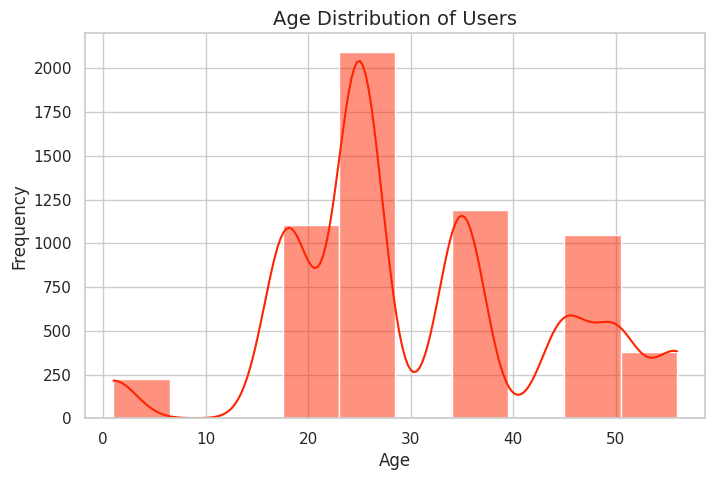

=== Descriptive Stats: Age (Users) ===


,Age
count,6040.000000
mean,30.639238
std,12.895962
min,1.000000
25%,25.000000
50%,25.000000
75%,35.000000
max,56.000000


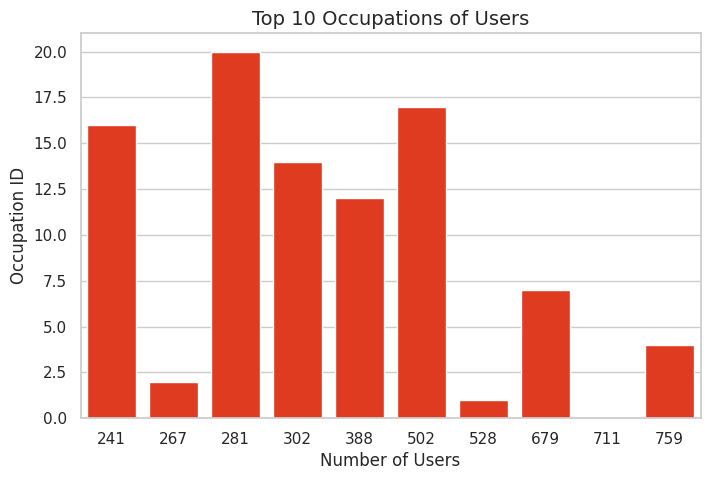

=== Occupation Distribution (Top 10) ===


,count
Occupation,
4,759
0,711
7,679
1,528
17,502
12,388
14,302
20,281
2,267


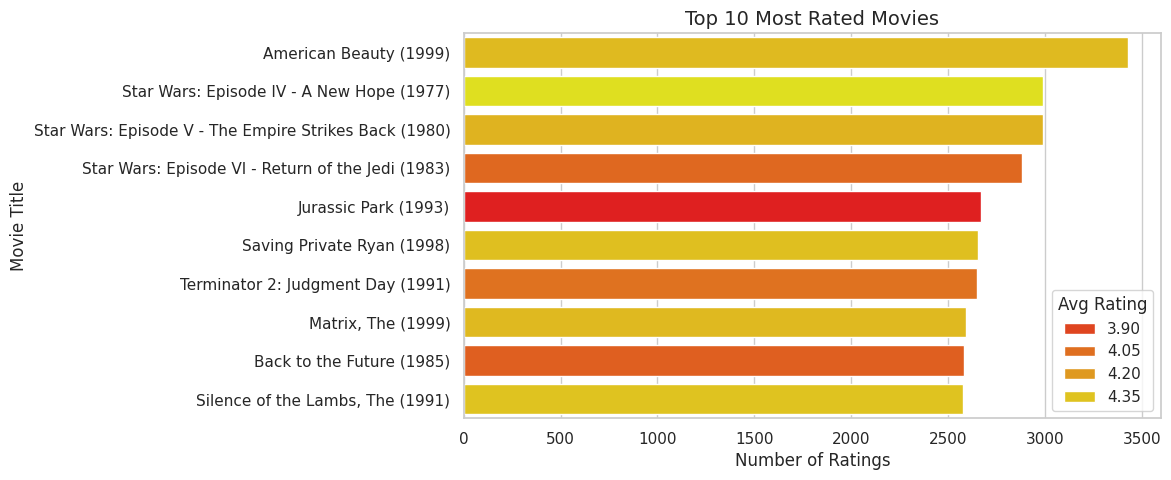

=== Top 10 Most Rated Movies (with Average Rating) ===


,Title,Number of Ratings,Average Rating
0,American Beauty (1999),3428,4.317386
1,Star Wars: Episode IV - A New Hope (1977),2991,4.453694
2,Star Wars: Episode V - The Empire Strikes Back...,2990,4.292977
3,Star Wars: Episode VI - Return of the Jedi (1983),2883,4.022893
4,Jurassic Park (1993),2672,3.763847
5,Saving Private Ryan (1998),2653,4.337354
6,Terminator 2: Judgment Day (1991),2649,4.058513
7,"Matrix, The (1999)",2590,4.315830
8,Back to the Future (1985),2583,3.990321
9,"Silence of the Lambs, The (1991)",2578,4.351823


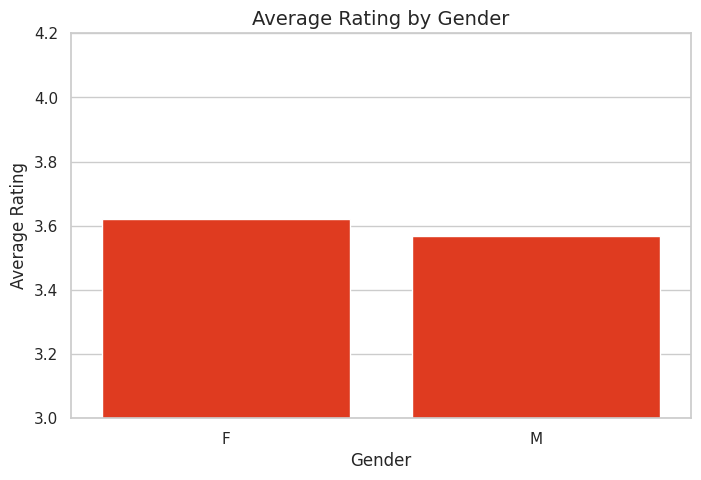

=== Average Rating by Gender ===


,Gender,Rating
0,F,3.620366
1,M,3.568879


=== SUMMARY OVERVIEW ===
จำนวนผู้ใช้ทั้งหมด: 6040
จำนวนภาพยนตร์ทั้งหมด: 3883
จำนวนการให้คะแนนทั้งหมด: 1000209
คะแนนเฉลี่ยโดยรวม: 3.58


In [ ]:
# --- STEP 1: Import Library ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Theme สีโทนร้อน
sns.set_theme(style="whitegrid", palette="autumn")
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# --- STEP 2: Load Data ---
movies_path = '/content/drive/My Drive/ProjectBigData/ml-1m/movies.dat'
ratings_path = '/content/drive/My Drive/ProjectBigData/ml-1m/ratings.dat'
users_path = '/content/drive/My Drive/ProjectBigData/ml-1m/users.dat'

users = pd.read_csv(users_path, sep="::", engine='python', encoding='latin-1',
                    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])
ratings = pd.read_csv(ratings_path, sep="::", engine='python', encoding='latin-1',
                      names=["UserID", "MovieID", "Rating", "Timestamp"])
movies = pd.read_csv(movies_path, sep="::", engine='python', encoding='latin-1',
                     names=["MovieID", "Title", "Genres"])

# ======================================================
# 🧩 SECTION 1: Ratings Distribution
# ======================================================

plt.figure()
sns.countplot(x="Rating", data=ratings)
plt.title("Distribution of Ratings")
plt.xlabel("Rating (1–5)")
plt.ylabel("Count")
plt.show()

print("=== Descriptive Stats: Ratings ===")
display(ratings_df["Rating"].describe())

# ======================================================
# 🧩 SECTION 2: Gender Distribution
# ======================================================

plt.figure()
sns.countplot(x="Gender", data=users)
plt.title("Gender Distribution of Users")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

print("=== Gender Distribution (%) ===")
display(users["Gender"].value_counts(normalize=True) * 100)

# ======================================================
# 🧩 SECTION 3: Age Distribution
# ======================================================

plt.figure()
sns.histplot(users["Age"], bins=10, kde=True)
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

print("=== Descriptive Stats: Age (Users) ===")
display(users["Age"].describe())

# ======================================================
# 🧩 SECTION 4: Occupation
# ======================================================

top_occ = users["Occupation"].value_counts().head(10)
plt.figure()
sns.barplot(x=top_occ.values, y=top_occ.index)
plt.title("Top 10 Occupations of Users")
plt.xlabel("Number of Users")
plt.ylabel("Occupation ID")
plt.show()

print("=== Occupation Distribution (Top 10) ===")
display(top_occ)

# ======================================================
# 🧩 SECTION 5: Movies with Most Ratings
# ======================================================

movie_stats = ratings.groupby("MovieID")["Rating"].agg(["count", "mean"]).reset_index()
top_movies = movie_stats.sort_values("count", ascending=False).head(10)
top_movies = top_movies.merge(movies[["MovieID", "Title"]], on="MovieID", how="left")

plt.figure(figsize=(9, 5))
sns.barplot(x="count", y="Title", data=top_movies, hue="mean", dodge=False, palette="autumn")
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.legend(title="Avg Rating", loc="lower right")
plt.show()

print("=== Top 10 Most Rated Movies (with Average Rating) ===")
display(top_movies[["Title", "count", "mean"]].rename(columns={
    "count": "Number of Ratings", "mean": "Average Rating"
}))

# ======================================================
# 🧩 SECTION 6: Rating per Gender
# ======================================================

gender_rating = ratings.merge(users[["UserID", "Gender"]], on="UserID")
avg_rating_by_gender = gender_rating.groupby("Gender")["Rating"].mean().reset_index()

plt.figure()
sns.barplot(x="Gender", y="Rating", data=avg_rating_by_gender)
plt.title("Average Rating by Gender")
plt.ylabel("Average Rating")
plt.ylim(3, 4.2)
plt.show()

print("=== Average Rating by Gender ===")
display(avg_rating_by_gender)

# ======================================================
# 🧾 SECTION 7: Summary Overview
# ======================================================

print("=== SUMMARY OVERVIEW ===")
print(f"จำนวนผู้ใช้ทั้งหมด: {users['UserID'].nunique()}")
print(f"จำนวนภาพยนตร์ทั้งหมด: {movies['MovieID'].nunique()}")
print(f"จำนวนการให้คะแนนทั้งหมด: {ratings.shape[0]}")
print(f"คะแนนเฉลี่ยโดยรวม: {ratings['Rating'].mean():.2f}")


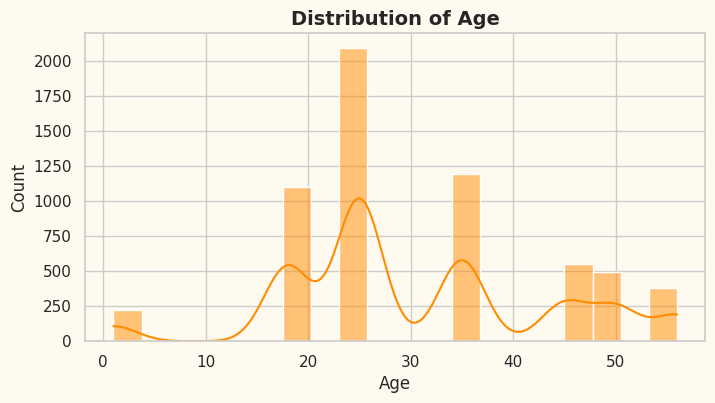

,Mean,Median,Std,Min,Max,Skewness,Kurtosis
Age,30.639238,25.000000,12.895962,1,56,0.242700,-0.290810


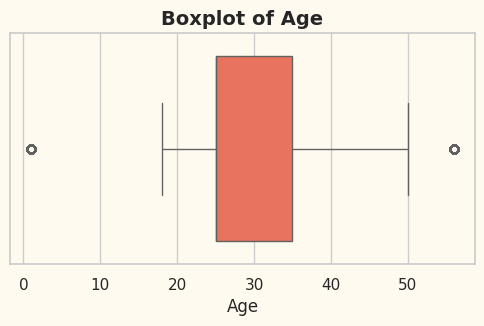

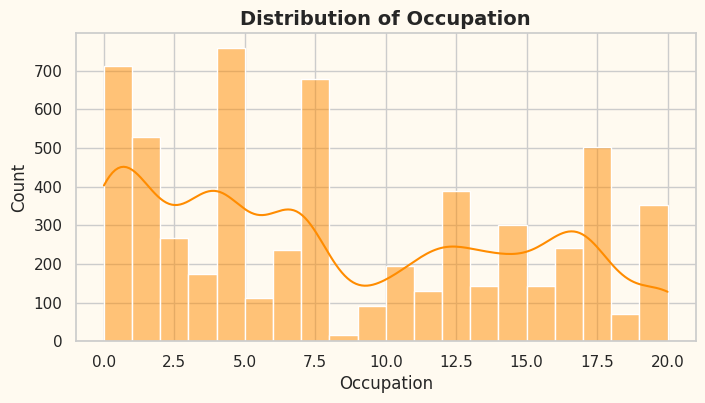

,Mean,Median,Std,Min,Max,Skewness,Kurtosis
Occupation,8.146854,7.000000,6.329511,0,20,0.338298,-1.214144


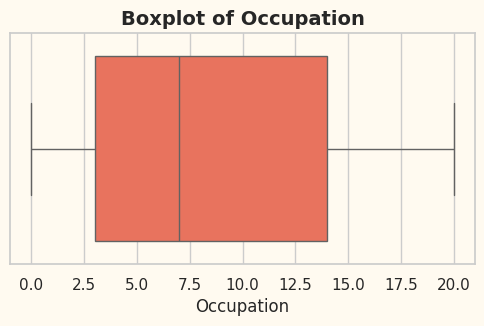

/tmp/ipython-input-829392758.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=users, x=col, palette='autumn')


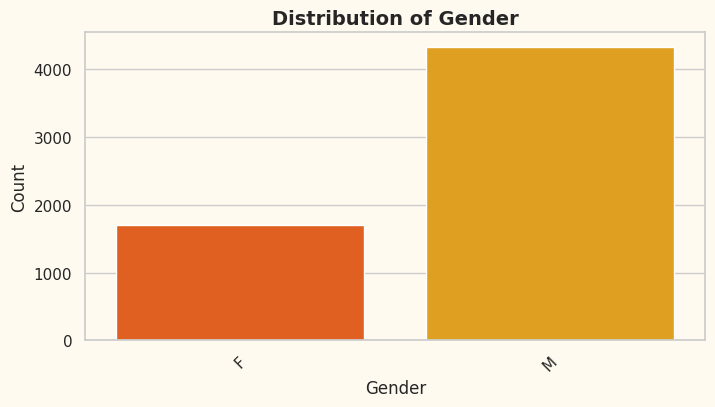

,Count
Gender,
M,4331
F,1709


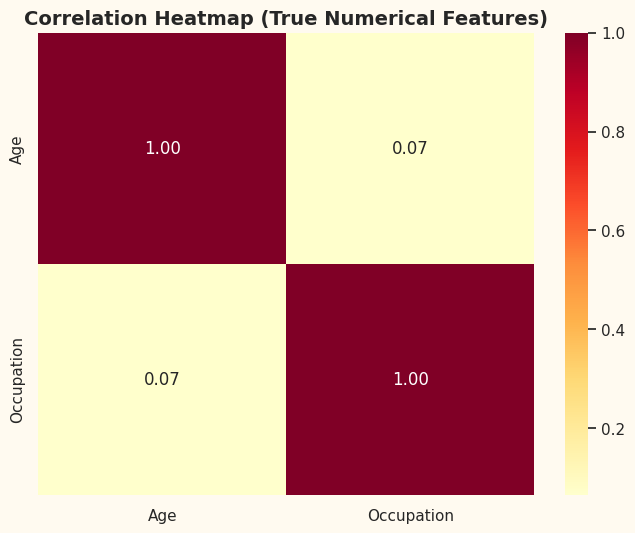

,count,mean,std,min,25%,50%,75%,max,median,skewness,kurtosis
Age,6040.000000,30.639238,12.895962,1.000000,25.000000,25.000000,35.000000,56.000000,25.000000,0.242700,-0.290810
Occupation,6040.000000,8.146854,6.329511,0.000000,3.000000,7.000000,14.000000,20.000000,7.000000,0.338298,-1.214144


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


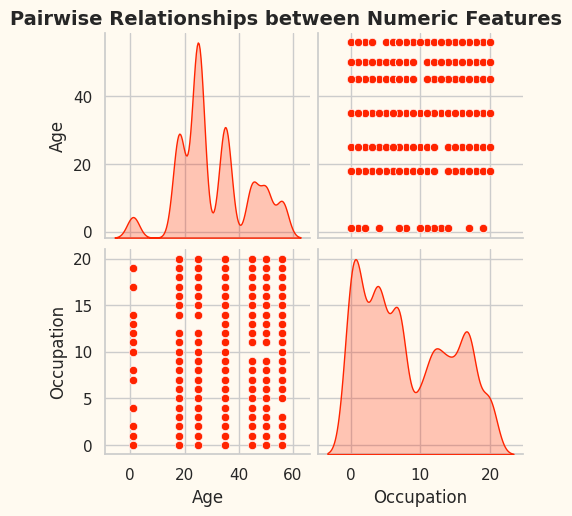

In [ ]:
# ======================================================
# 📊 SECTION 1: DESCRIPTIVE STATISTICS (ฉบับสมบูรณ์โทนสีร้อน)
# ======================================================

# --- STEP 1: Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 2: Load Data ---
movies = '/content/drive/My Drive/ProjectBigData/ml-1m/movies.dat'
ratings = '/content/drive/My Drive/ProjectBigData/ml-1m/ratings.dat'
users = '/content/drive/My Drive/ProjectBigData/ml-1m/users.dat'

users = pd.read_csv(users, sep="::", engine='python', encoding='latin-1',
                    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])
ratings = pd.read_csv(ratings, sep="::", engine='python', encoding='latin-1',
                      names=["UserID", "MovieID", "Rating", "Timestamp"])
movies = pd.read_csv(movies, sep="::", engine='python', encoding='latin-1',
                     names=["MovieID", "Title", "Genres"])

# --- STEP 3: Theme Setting (โทนสีร้อน) ---
sns.set(style="whitegrid", palette="autumn")
plt.rcParams['figure.facecolor'] = '#fffaf0'
plt.rcParams['axes.facecolor'] = '#fffaf0'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'


# ======================================================
# 1️⃣ Distribution & Summary for True Numerical Variables
# ======================================================

# คัดเฉพาะคอลัมน์ที่เป็นเชิงปริมาณจริง ๆ (เช่น อายุ, Occupation ถ้ามีความหมาย)
numeric_cols = [col for col in users.select_dtypes(include=['int64', 'float64']).columns
                if col not in ['UserID', 'Zip-code']]

for col in numeric_cols:
    # 🔶 กราฟ Distribution
    plt.figure(figsize=(8,4))
    sns.histplot(users[col], bins=20, kde=True, color='darkorange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    # 🔶 ตาราง Summary Statistics (เฉพาะคอลัมน์นั้น)
    desc = pd.DataFrame({
        'Mean': [users[col].mean()],
        'Median': [users[col].median()],
        'Std': [users[col].std()],
        'Min': [users[col].min()],
        'Max': [users[col].max()],
        'Skewness': [users[col].skew()],
        'Kurtosis': [users[col].kurtosis()]
    }, index=[col])
    display(desc.style.background_gradient(cmap='OrRd'))

    # 🔶 กราฟ Boxplot
    plt.figure(figsize=(6,3))
    sns.boxplot(x=users[col], color='tomato')
    plt.title(f'Boxplot of {col}')
    plt.show()


# ======================================================
# 2️⃣ Distribution & Summary for Categorical Variables
# ======================================================
cat_cols = [col for col in users.select_dtypes(include=['object']).columns
            if col not in ['Zip-code']]

for col in cat_cols:
    # 🔶 กราฟ Countplot
    plt.figure(figsize=(8,4))
    sns.countplot(data=users, x=col, palette='autumn')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # 🔶 ตาราง Count
    count_table = users[col].value_counts().to_frame('Count')
    display(count_table.style.background_gradient(cmap='YlOrBr'))


# ======================================================
# 3️⃣ Correlation Heatmap
# ======================================================
plt.figure(figsize=(8,6))
sns.heatmap(users[numeric_cols].corr(numeric_only=True), annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Correlation Heatmap (True Numerical Features)')
plt.show()


# ======================================================
# 4️⃣ Summary Statistics (รวมทุกคอลัมน์เชิงปริมาณจริง)
# ======================================================
summary = users[numeric_cols].describe().T
summary['median'] = users[numeric_cols].median()
summary['skewness'] = users[numeric_cols].skew()
summary['kurtosis'] = users[numeric_cols].kurtosis()

display(summary.style.background_gradient(cmap='OrRd')
        .set_caption("Overall Summary Statistics (Users Data, excluding ID & Code columns)"))


# ======================================================
# 5️⃣ Pairplot (Optional)
# ======================================================
if len(numeric_cols) > 1:
    sns.pairplot(users[numeric_cols], diag_kind='kde', palette='autumn')
    plt.suptitle('Pairwise Relationships between Numeric Features', y=1.02, fontsize=14, fontweight='bold')
    plt.show()


/tmp/ipython-input-3358622411.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating", data=ratings, palette='autumn')


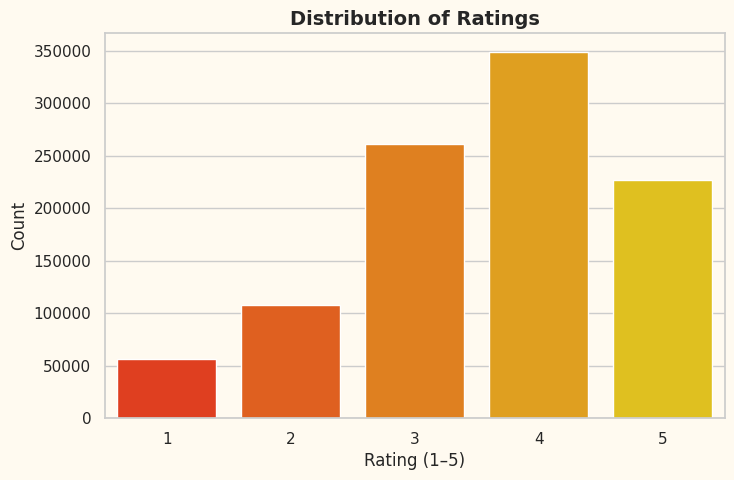

,Rating
count,1.000209e+06
mean,3.581564e+00
std,1.117102e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,4.000000e+00
max,5.000000e+00


/tmp/ipython-input-3358622411.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=users, palette='autumn')


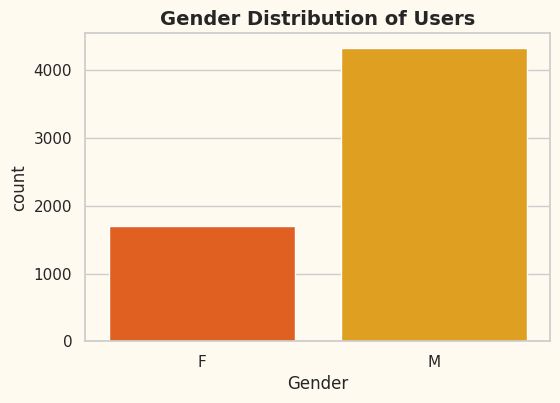

,proportion
Gender,
M,71.705298
F,28.294702


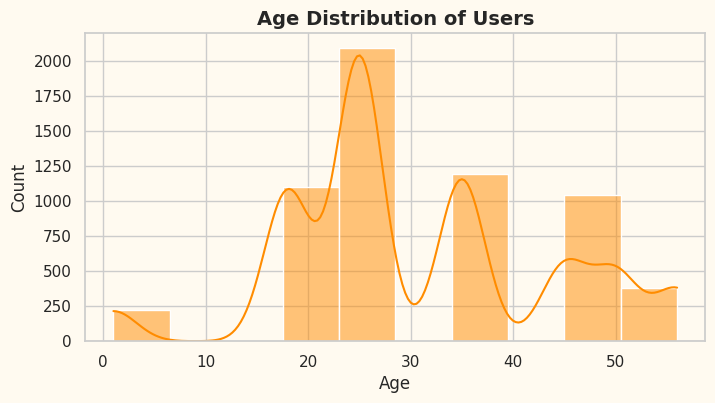

,Age
count,6040.000000
mean,30.639238
std,12.895962
min,1.000000
25%,25.000000
50%,25.000000
75%,35.000000
max,56.000000


/tmp/ipython-input-3358622411.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_occ.values, y=top_occ.index, palette='autumn')


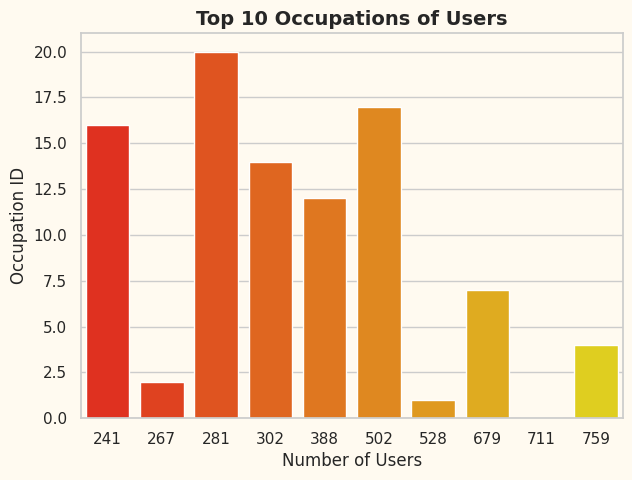

,count
Occupation,
4,759
0,711
7,679
1,528
17,502
12,388
14,302
20,281
2,267


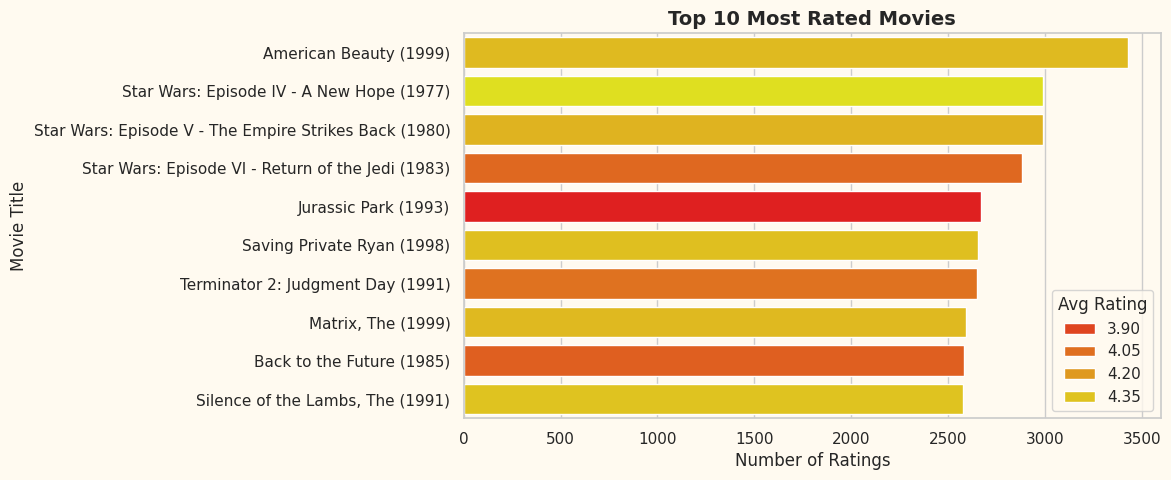

,Title,Number of Ratings,Average Rating
0,American Beauty (1999),3428,4.317386
1,Star Wars: Episode IV - A New Hope (1977),2991,4.453694
2,Star Wars: Episode V - The Empire Strikes Back...,2990,4.292977
3,Star Wars: Episode VI - Return of the Jedi (1983),2883,4.022893
4,Jurassic Park (1993),2672,3.763847
5,Saving Private Ryan (1998),2653,4.337354
6,Terminator 2: Judgment Day (1991),2649,4.058513
7,"Matrix, The (1999)",2590,4.315830
8,Back to the Future (1985),2583,3.990321
9,"Silence of the Lambs, The (1991)",2578,4.351823


/tmp/ipython-input-3358622411.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="Rating", data=avg_rating_by_gender, palette='autumn')


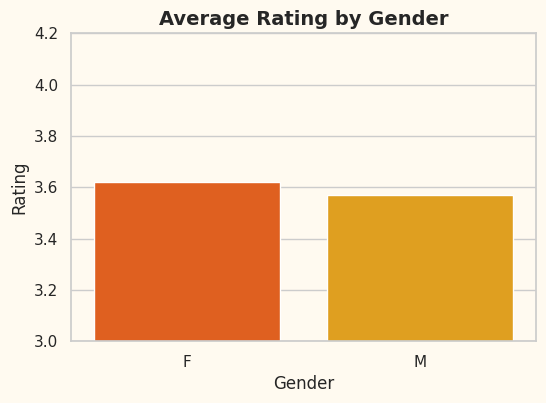

,Gender,Rating
0,F,3.620366
1,M,3.568879


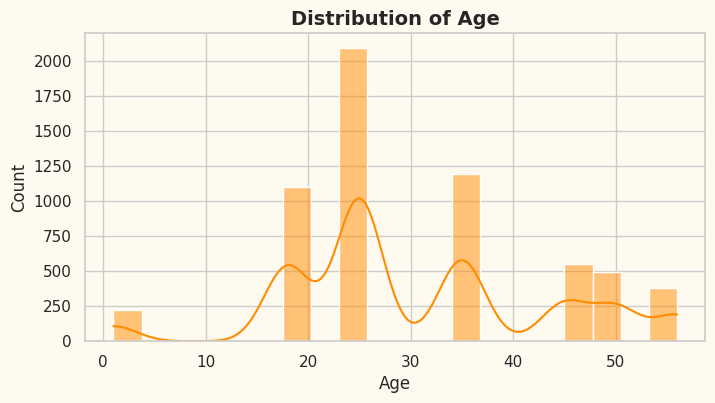

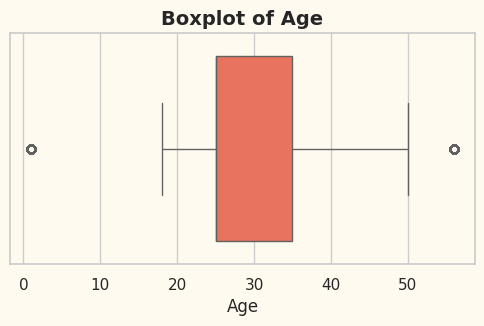

,Mean,Median,Std,Min,Max,Skewness,Kurtosis
Age,30.639238,25.000000,12.895962,1,56,0.242700,-0.290810


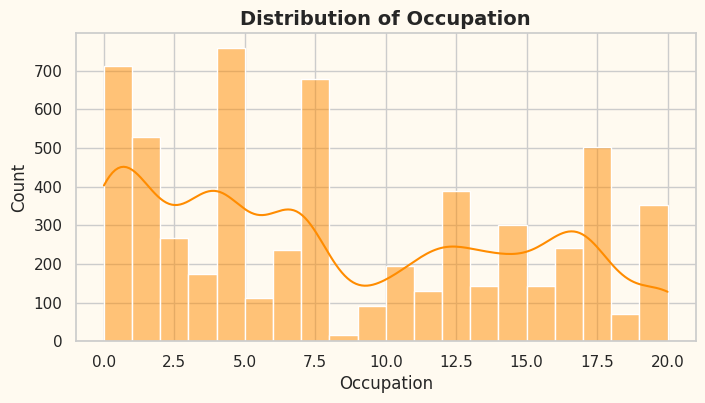

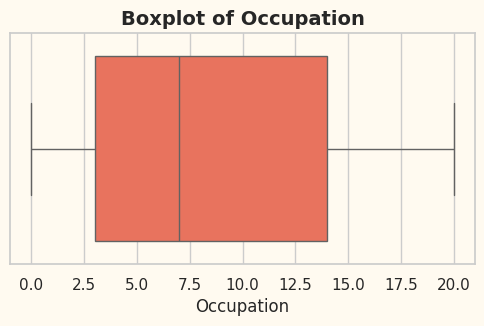

,Mean,Median,Std,Min,Max,Skewness,Kurtosis
Occupation,8.146854,7.000000,6.329511,0,20,0.338298,-1.214144


/tmp/ipython-input-3358622411.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=users, x=col, palette='autumn')


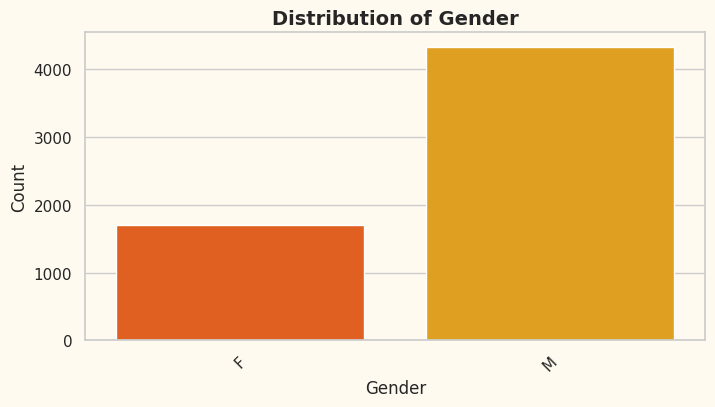

,Count
Gender,
M,4331
F,1709


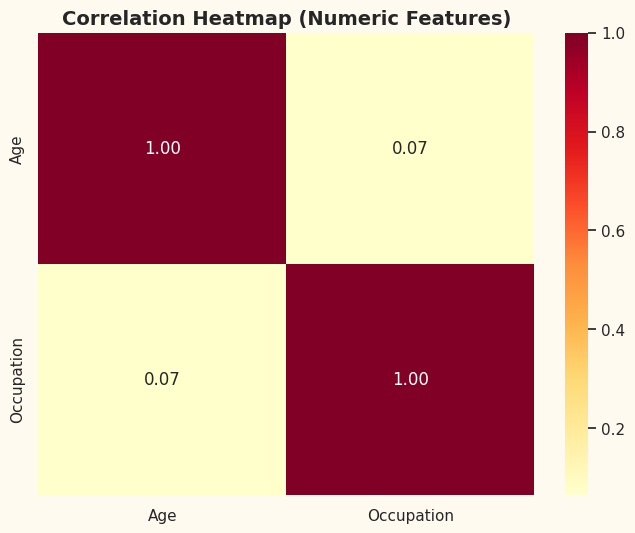

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


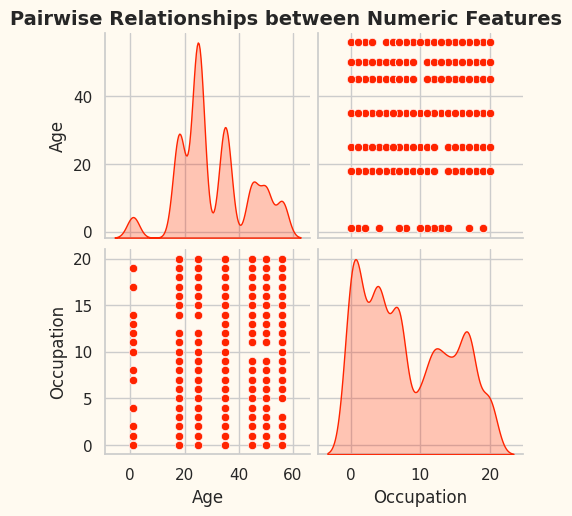

=== SUMMARY OVERVIEW ===
Total Users: 6040
Total Movies: 3883
Total Ratings: 1000209
Overall Average Rating: 3.58


In [ ]:
# ======================================================
# 📊 FULL DESCRIPTIVE ANALYSIS: Users + Ratings + Movies
# ======================================================

# --- STEP 1: Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 2: Load Data ---
movies_path = '/content/drive/My Drive/ProjectBigData/ml-1m/movies.dat'
ratings_path = '/content/drive/My Drive/ProjectBigData/ml-1m/ratings.dat'
users_path = '/content/drive/My Drive/ProjectBigData/ml-1m/users.dat'

users = pd.read_csv(users_path, sep="::", engine='python', encoding='latin-1',
                    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])
ratings = pd.read_csv(ratings_path, sep="::", engine='python', encoding='latin-1',
                      names=["UserID", "MovieID", "Rating", "Timestamp"])
movies = pd.read_csv(movies_path, sep="::", engine='python', encoding='latin-1',
                     names=["MovieID", "Title", "Genres"])

# --- STEP 3: Theme Setting (โทนสีร้อน) ---
sns.set(style="whitegrid", palette="autumn")
plt.rcParams['figure.facecolor'] = '#fffaf0'
plt.rcParams['axes.facecolor'] = '#fffaf0'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

# ======================================================
# 1️⃣ Ratings Distribution
# ======================================================
plt.figure(figsize=(8,5))
sns.countplot(x="Rating", data=ratings, palette='autumn')
plt.title("Distribution of Ratings")
plt.xlabel("Rating (1–5)")
plt.ylabel("Count")
plt.show()

display(ratings["Rating"].describe())

# ======================================================
# 2️⃣ Gender Distribution
# ======================================================
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=users, palette='autumn')
plt.title("Gender Distribution of Users")
plt.show()

display(users["Gender"].value_counts(normalize=True)*100)

# ======================================================
# 3️⃣ Age Distribution
# ======================================================
plt.figure(figsize=(8,4))
sns.histplot(users["Age"], bins=10, kde=True, color='darkorange')
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

display(users["Age"].describe())

# ======================================================
# 4️⃣ Top 10 Occupations
# ======================================================
top_occ = users["Occupation"].value_counts().head(10)
plt.figure(figsize=(7,5))
sns.barplot(x=top_occ.values, y=top_occ.index, palette='autumn')
plt.title("Top 10 Occupations of Users")
plt.xlabel("Number of Users")
plt.ylabel("Occupation ID")
plt.show()

display(top_occ)

# ======================================================
# 5️⃣ Top 10 Most Rated Movies
# ======================================================
movie_stats = ratings.groupby("MovieID")["Rating"].agg(["count","mean"]).reset_index()
top_movies = movie_stats.sort_values("count", ascending=False).head(10)
top_movies = top_movies.merge(movies[["MovieID","Title"]], on="MovieID", how="left")

plt.figure(figsize=(9,5))
sns.barplot(x="count", y="Title", data=top_movies, hue="mean", dodge=False, palette="autumn")
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.legend(title="Avg Rating", loc="lower right")
plt.show()

display(top_movies[["Title","count","mean"]].rename(columns={"count":"Number of Ratings","mean":"Average Rating"}))

# ======================================================
# 6️⃣ Average Rating per Gender
# ======================================================
gender_rating = ratings.merge(users[["UserID","Gender"]], on="UserID")
avg_rating_by_gender = gender_rating.groupby("Gender")["Rating"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x="Gender", y="Rating", data=avg_rating_by_gender, palette='autumn')
plt.title("Average Rating by Gender")
plt.ylim(3,4.2)
plt.show()

display(avg_rating_by_gender)

# ======================================================
# 7️⃣ Users - Numeric Features Analysis
# ======================================================
numeric_cols = [col for col in users.select_dtypes(include=['int64','float64']).columns if col not in ['UserID','Zip-code']]

for col in numeric_cols:
    # Distribution
    plt.figure(figsize=(8,4))
    sns.histplot(users[col], bins=20, kde=True, color='darkorange')
    plt.title(f'Distribution of {col}')
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,3))
    sns.boxplot(x=users[col], color='tomato')
    plt.title(f'Boxplot of {col}')
    plt.show()

    # Summary stats
    desc = pd.DataFrame({
        "Mean":[users[col].mean()],
        "Median":[users[col].median()],
        "Std":[users[col].std()],
        "Min":[users[col].min()],
        "Max":[users[col].max()],
        "Skewness":[users[col].skew()],
        "Kurtosis":[users[col].kurtosis()]
    }, index=[col])
    display(desc.style.background_gradient(cmap='OrRd'))

# ======================================================
# 8️⃣ Users - Categorical Features Analysis
# ======================================================
cat_cols = [col for col in users.select_dtypes(include=['object']).columns if col not in ['Zip-code']]

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=users, x=col, palette='autumn')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    count_table = users[col].value_counts().to_frame('Count')
    display(count_table.style.background_gradient(cmap='YlOrBr'))

# ======================================================
# 9️⃣ Correlation Heatmap
# ======================================================
plt.figure(figsize=(8,6))
sns.heatmap(users[numeric_cols].corr(), annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

# ======================================================
# 🔟 Pairplot (Optional)
# ======================================================
if len(numeric_cols) > 1:
    sns.pairplot(users[numeric_cols], diag_kind='kde', palette='autumn')
    plt.suptitle('Pairwise Relationships between Numeric Features', y=1.02, fontsize=14, fontweight='bold')
    plt.show()

# ======================================================
# 1️⃣1️⃣ Summary Overview
# ======================================================
print("=== SUMMARY OVERVIEW ===")
print(f"Total Users: {users['UserID'].nunique()}")
print(f"Total Movies: {movies['MovieID'].nunique()}")
print(f"Total Ratings: {ratings.shape[0]}")
print(f"Overall Average Rating: {ratings['Rating'].mean():.2f}")




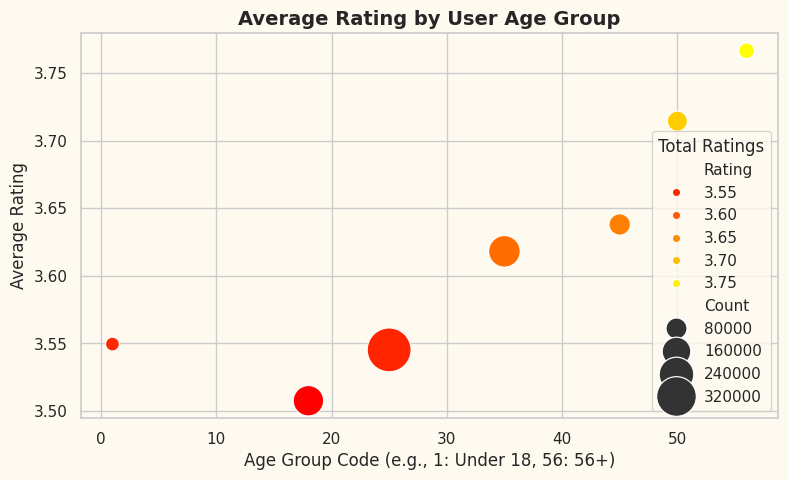

,Age,Rating,Count
6,56,3.766632,38780
5,50,3.714512,72490
4,45,3.638062,83633
3,35,3.618162,199003
0,1,3.549520,27211
2,25,3.545235,395556
1,18,3.507573,183536


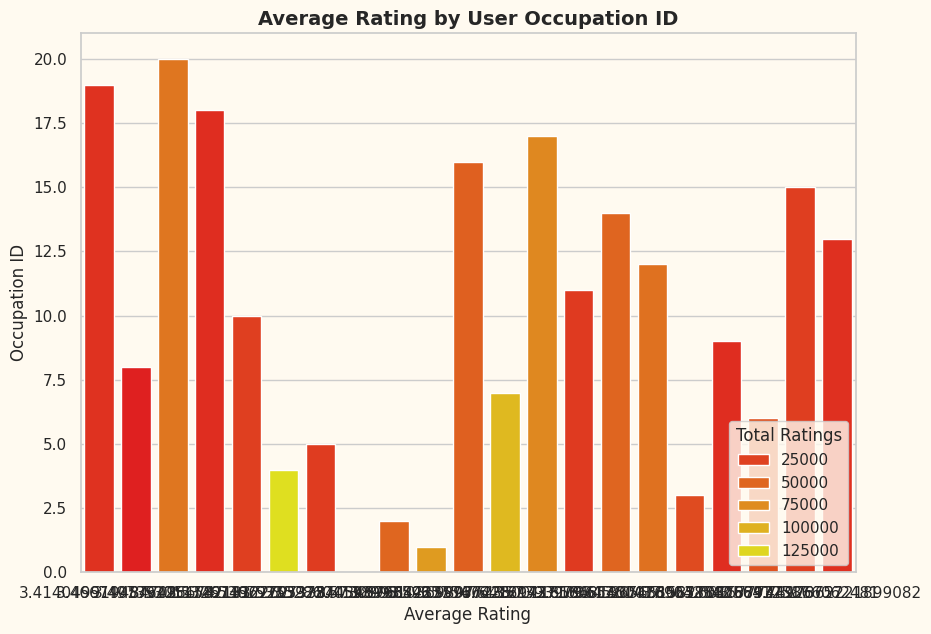

,Occupation,Total Ratings,Average Rating
13,13,13754,3.781736
15,15,22951,3.689774
6,6,37205,3.661578
9,9,11345,3.656589
3,3,31623,3.656516
12,12,57214,3.654001
14,14,49109,3.618481
11,11,20563,3.617371
17,17,72816,3.613574
7,7,105425,3.599772


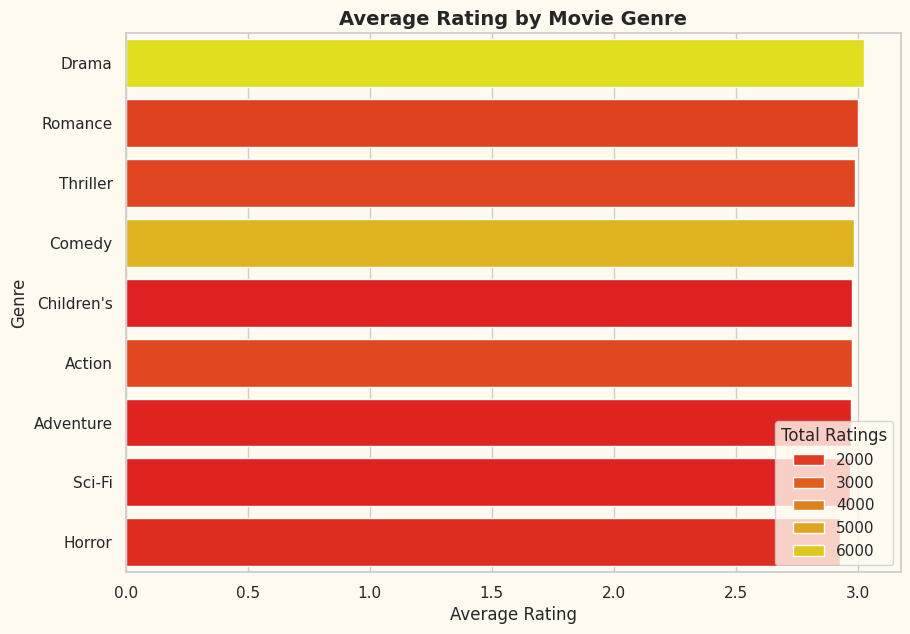

,Genre,Total Ratings,Average Rating
7,Drama,6675,3.026367
13,Romance,2184,3.000458
15,Thriller,2304,2.988281
4,Comedy,5408,2.987426
3,Children's,1217,2.976993
0,Action,2368,2.976351
1,Adventure,1343,2.973194
14,Sci-Fi,1327,2.970610
10,Horror,1575,2.929524


In [ ]:
# ไม่แน่ใจว่าส่วนนี้จะเอาไปใช้กับ data viz ได้มั้ย
# --- STEP 1: Ensure Data Merging for Comprehensive Analysis ---
# ทำการ Merge ข้อมูลทั้งหมดเข้าด้วยกันเพื่อวิเคราะห์ Rating ร่วมกับทุก Features
# (ถ้าทำแล้วในส่วนก่อนหน้านี้ให้ข้ามได้ แต่เพื่อให้โค้ดนี้ทำงานได้สมบูรณ์จึงใส่ไว้)
full_data = ratings.merge(users, on='UserID').merge(movies, on='MovieID')

# ======================================================
# 1️⃣2️⃣ Average Rating by Age Group
# ======================================================
# วิเคราะห์ว่ากลุ่มอายุใดมีแนวโน้มให้คะแนนสูงหรือต่ำกว่ากลุ่มอื่น
avg_rating_by_age = full_data.groupby('Age')['Rating'].mean().reset_index()
# เพิ่มการนับจำนวนเรตติ้งเพื่อดูน้ำหนักของแต่ละกลุ่ม
age_counts = full_data.groupby('Age')['Rating'].count().reset_index().rename(columns={'Rating': 'Count'})
avg_rating_by_age = avg_rating_by_age.merge(age_counts, on='Age')

plt.figure(figsize=(9, 5))
# ใช้ขนาดของจุด (Count) เพื่อแสดงน้ำหนักของข้อมูล
sns.scatterplot(x='Age', y='Rating', size='Count', data=avg_rating_by_age,
                palette='autumn', sizes=(100, 1000), hue='Rating')
plt.title('Average Rating by User Age Group')
plt.xlabel('Age Group Code (e.g., 1: Under 18, 56: 56+)')
plt.ylabel('Average Rating')
plt.legend(title="Total Ratings", loc="lower right")
plt.show()
display(avg_rating_by_age.sort_values('Rating', ascending=False))

# ======================================================
# 1️⃣3️⃣ Average Rating by Occupation
# ======================================================
# วิเคราะห์ว่าอาชีพใดมีแนวโน้มให้คะแนนต่างจากอาชีพอื่น
avg_rating_by_occ = full_data.groupby('Occupation')['Rating'].agg(['count', 'mean']).reset_index()
avg_rating_by_occ = avg_rating_by_occ.sort_values('mean', ascending=False)

plt.figure(figsize=(10, 7))
# ใช้ Barplot เพื่อเปรียบเทียบค่าเฉลี่ย และใช้ Hue/Color เพื่อสื่อถึงจำนวน
sns.barplot(x='mean', y='Occupation', data=avg_rating_by_occ, palette='autumn', hue='count', dodge=False)
plt.title('Average Rating by User Occupation ID')
plt.xlabel('Average Rating')
plt.ylabel('Occupation ID')
plt.legend(title='Total Ratings', loc='lower right')
plt.show()
display(avg_rating_by_occ.rename(columns={'count': 'Total Ratings', 'mean': 'Average Rating'}))

# ======================================================
# 1️⃣4️⃣ Average Rating by Movie Genre
# ======================================================
# วิเคราะห์ว่าภาพยนตร์แนวไหนที่ได้คะแนนเฉลี่ยสูงที่สุด
# เนื่องจาก Genres เป็นข้อความที่มีหลายแนวคั่นด้วย '|' จึงต้องแยกออกมาก่อน

# Step A: Split Genres and Explode
genre_data = full_data[['MovieID', 'Rating', 'Genres']].drop_duplicates(subset=['MovieID', 'Rating']).copy()
genre_data['Genre'] = genre_data['Genres'].str.split('|')
genre_ratings = genre_data.explode('Genre')

# Step B: Calculate Avg Rating per Genre
avg_rating_by_genre = genre_ratings.groupby('Genre')['Rating'].agg(['count', 'mean']).reset_index()
# กรองแนวหนังที่มีจำนวนเรตติ้งน้อยกว่า 1000 ออก (Optional: เพื่อความน่าเชื่อถือ)
avg_rating_by_genre = avg_rating_by_genre[avg_rating_by_genre['count'] > 1000].sort_values('mean', ascending=False)

# Step C: Visualization
plt.figure(figsize=(10, 7))
sns.barplot(x='mean', y='Genre', data=avg_rating_by_genre, palette='autumn', hue='count', dodge=False)
plt.title('Average Rating by Movie Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.legend(title='Total Ratings', loc='lower right')
plt.show()

display(avg_rating_by_genre.rename(columns={'count': 'Total Ratings', 'mean': 'Average Rating'}))

In [ ]:
import plotly.express as px
import pandas as pd

# -----------------------------------------------------
# 🔴 NEW WARM/AUTUMN COLOR PALETTE (โทนสีร้อน)
# -----------------------------------------------------
# สร้างชุดสีโทนร้อนใหม่จากเฉดสีหลักใน Plotly
warm_color_palette = px.colors.sequential.YlOrRd[:8] + px.colors.sequential.Reds[3:9]

# -----------------------------------------------------
# 🛠️ Re-run the Scatter Plot with the NEW WARM Palette
# -----------------------------------------------------

# Define movie_stats_filtered by filtering movie_stats
# Assuming movie_stats is available from previous cells (e.g., cell lQql7ux7NLQi)
# If not, you would need to recreate movie_stats here as well.
# Based on the notebook state, movie_stats is available.
MIN_COUNT = 50
movie_stats_filtered = movie_stats[movie_stats['count'] >= MIN_COUNT].copy()

# Merge with the movies dataframe to get Title and Genres
# Assuming movies dataframe is available from previous cells
movie_stats_filtered = movie_stats_filtered.merge(movies[['MovieID', 'Title', 'Genres']], on='MovieID', how='left')

# Rename columns to match the plotting code
movie_stats_filtered = movie_stats_filtered.rename(columns={'count': 'votes', 'mean': 'avg_rating'})

# Add 'Year' and 'Genre1' columns needed for hover_data and color
# Extract Year from Title
movie_stats_filtered['Year'] = movie_stats_filtered['Title'].str.extract(r'\((\d{4})\)').astype(float)

# Extract the first Genre
movie_stats_filtered['Genre1'] = movie_stats_filtered['Genres'].str.split('|').str[0]


fig = px.scatter(movie_stats_filtered, x='avg_rating', y='votes',
                 labels={'avg_rating': 'Average Rating', 'votes': 'Number of Votes'},
                 title='Relationship Between Average Rating and Number of Votes (Warm Theme)',
                 opacity=0.6,
                 hover_data=['Title', 'Year', 'Genre1', 'votes', 'avg_rating'],
                 color='Genre1', # Color by Genre1 to cycle through the palette
                 color_discrete_sequence=warm_color_palette, # ใช้ชุดสีโทนร้อนใหม่
                 log_y=True)

# ปรับ Layout ให้เข้ากับ Warm Theme เดิม
fig.update_layout(
    title_font_color="#b30000", # แดงเข้ม
    paper_bgcolor='#fffaf0', # สีงาช้างอ่อน (Warm, Light Background)
    plot_bgcolor='#ffffff',
    legend_title_text='Primary Genre'
)

fig.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming movie_stats_filtered dataframe is available from previous cells (e.g., cell -JczfY0nSHbi)
# If not, you would need to recreate it here by filtering movie_stats and merging with movies.
# Based on the notebook state, movie_stats_filtered is available.

# Check if movie_stats_filtered is defined and not empty
if 'movie_stats_filtered' not in locals() or movie_stats_filtered.empty:
    print("DataFrame 'movie_stats_filtered' is empty or not defined. Please run the previous cell.")
else:
    # Remove the genre mapping line as Genre1 already contains genre names
    # movie_stats_filtered['Genre1'] = movie_stats_filtered['Genre1'].map(genre_mapping) # This line is removed

    # Create the scatter plot with hover data and custom color
    fig = px.scatter(movie_stats_filtered, x='avg_rating', y='votes',
                     labels={'avg_rating': 'Average Rating', 'votes': 'Number of Votes'},
                     title='Relationship Between Average Rating and Number of Votes',
                     opacity=0.5,
                     hover_data=['Title', 'Year', 'Genre1'],
                     color_discrete_sequence=['#64bf97'])  # Apply custom color

    # Show the plot
    fig.show()

#### Data visualization

#### Target variable analysis

- Target variable analysis: examine how each feature correlates with or impacts the target/interested variable


## Data Modeling

In [ ]:
# Partition data

# Handle imbalance data (optional)

# Model selection and tuning

# Evaluate models


#### สรุปผลที่ได้
...

-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab / GitHub ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * Data Description: อธิบายข้อมูลที่ใช้
    * Data Preparation: การเตรียมข้อมูลก่อนวิเคราะห์
    * Motivation: ปัญหาหรือคำถามที่ตั้ง ทำไมถึงสนใจที่จะทำงานในเรื่องนี้
    * Communicating Results (with figure, table, etc.): ผลที่ได้จากการศึกษา โดยระบุแนวทางที่ใช้ที่ทำให้เกิดผลลัพธ์ดังกล่าวด้วย
        โดยไม่ต้องนำเสนอ source code ผลประกอบด้วย 2 ส่วนสำคัญ จาก
        * Conjectures >= 3 ข้อ
        * Machine learning models
    * Conclusion: สรุปผลที่ได้จากการวิเคราะห์ข้อมูล
** Note: แต่ละกลุ่มส่งแต่ละไฟล์ครั้งเดียว **
---------------------

---

## **Data**

---

### **รายละเอียดข้อมูล MovieLens 1M**

### 1️⃣ **ไฟล์ ratings.dat**

**โครงสร้างข้อมูล:**

```
UserID::MovieID::Rating::Timestamp
```

**รายละเอียด:**

* UserID: หมายเลขผู้ใช้ (1 ถึง 6040)
* MovieID: หมายเลขภาพยนตร์ (1 ถึง 3952)
* Rating: คะแนนจาก 1 ถึง 5 ดาว (เต็มดาวเท่านั้น)
* Timestamp: เวลาการให้คะแนน (หน่วยเป็นวินาที ตั้งแต่ epoch time)
* ผู้ใช้ทุกคนให้คะแนนอย่างน้อย **20 เรื่อง**

---

### 2️⃣ **ไฟล์ users.dat**

**โครงสร้างข้อมูล:**

```
UserID::Gender::Age::Occupation::Zip-code
```

**รายละเอียด:**

* Gender:

  * “M” = ผู้ชาย
  * “F” = ผู้หญิง
* Age (ช่วงอายุ):

  ```
  1: ต่ำกว่า 18 ปี
  18: 18–24 ปี
  25: 25–34 ปี
  35: 35–44 ปี
  45: 45–49 ปี
  50: 50–55 ปี
  56: 56 ปีขึ้นไป
  ```
* Occupation (อาชีพ):

  ```
  0: อื่น ๆ / ไม่ระบุ
  1: ครู / นักวิชาการ
  2: ศิลปิน
  3: ธุรการ / งานสำนักงาน
  4: นักศึกษามหาวิทยาลัย / บัณฑิตศึกษา
  5: บริการลูกค้า
  6: แพทย์ / สาธารณสุข
  7: ผู้บริหาร / ผู้จัดการ
  8: เกษตรกร
  9: แม่บ้าน
  10: นักเรียนมัธยม
  11: ทนายความ
  12: โปรแกรมเมอร์
  13: ผู้เกษียณอายุ
  14: ฝ่ายขาย / การตลาด
  15: นักวิทยาศาสตร์
  16: อาชีพอิสระ
  17: ช่างเทคนิค / วิศวกร
  18: ช่างฝีมือ / ช่างไม้
  19: ว่างงาน
  20: นักเขียน
  ```
* ข้อมูลประชากรทั้งหมดมาจากการกรอกโดยสมัครใจของผู้ใช้
  และ **ไม่ได้ตรวจสอบความถูกต้อง**

---

### 3️⃣ **ไฟล์ movies.dat**

**โครงสร้างข้อมูล:**

```
MovieID::Title::Genres
```

**รายละเอียด:**

* Title: ชื่อภาพยนตร์ (รวมปีที่ออกฉายตาม IMDb)
* Genres: ประเภทของภาพยนตร์ (คั่นด้วย “|”)
  เช่น `Action|Comedy|Romance`
* หมวดหมู่ภาพยนตร์ที่ใช้มีดังนี้:

  ```
  Action, Adventure, Animation, Children's, Comedy, Crime,
  Documentary, Drama, Fantasy, Film-Noir, Horror, Musical,
  Mystery, Romance, Sci-Fi, Thriller, War, Western
  ```
* หมายเลขภาพยนตร์บางรายการอาจเป็นข้อมูลซ้ำหรือข้อมูลทดสอบ
* รายการภาพยนตร์ส่วนใหญ่ถูกป้อนด้วยมือ อาจมีข้อผิดพลาดเล็กน้อย

#### ปัญหา/คำถามที่สนใจคืออะไร
...

#### ปัญหา/คำถามที่สนใจมีความสำคัญอย่างไร?
...

#### ข้อคาดการณ์ของท่านจะนำไปสู่การแก้ไขปัญหาหรือตอบคำถาม
1. ...
2. ...
3. ...
4. (Optional)
5. (Optional)